
#Grupo 14

In [ ]:
!pip install ortools

#Problema 2: Sudoku

 Pretende-se criar uma definição do jogo “Sudoku” generalizado para a dimensão N. Sendo que, o objetivo do Sudoku é preencher uma grelha de N^2*N^2,com inteiros positivos no intervalo 1 até N^2. Considerando, a variável inteira $m_{c,l}$ como a matriz de tamanho $c\times l$, iremos analisar os requisitos deste jogo:

$Limitações$
* Cada inteiro, no intervalo de 1 até N^2, ocorre só uma vez em cada coluna.

$$\forall_{l<N} \quad \sum_{c<N-1} m_{c,l}- \sum_{c<c1<N} m_{c1,l} \neq0 $$

* Cada inteiro, no intervalo de 1 até N^2, ocorre só uma vez em cada linha.

$$\forall_{c<N^2} \quad \sum_{l<N-1} m_{c,l} = 1 $$

* Cada inteiro, no intervalo de 1 até N^2, ocorre só uma vez em cada secção N * N. (Considerando Ca, uma "casa" do sudoku)

$$\forall_{0<x<l} : l/x, \quad  \forall_{0<y<c} : c/y, \quad Ca_{y,x} - (  \forall_{x<x1<l} : l/x_{1}, \quad  \forall_{y<y1<c} : c/y_{1}, \quad Ca_{y_{1},x_{1}}) \neq0 $$



In [1]:
def trabalho_1_sudoku():
  n = [3,4,5,6]
  alfa = [0.0,0.2,0.4,0.6]

  print(" N \ Alfa|   0.0   |   0.2   |   0.4   |   0.6   |")
  print("--------------------------------------------------")

  n_tests = 3

  for n_value in n:
    print ("    "+ str(n_value) + "    |", end = "")
    for alfa_value in alfa:
      time = 0
      # Repetir cada teste, n_tests vezes
      for _ in range(n_tests):
        res = benchmark_sudoku_matrix(n_value, alfa_value, False)
        time = time + res
      print(" %.5f |" % (time/n_tests),  end = "")
      time = 0
    print("\n--------------------------------------------------")

trabalho_1_sudoku()

 N \ Alfa|   0.0   |   0.2   |   0.4   |   0.6   |
--------------------------------------------------
    3    |

NameError: ignored

In [2]:
# Importar biblioteca
from ortools.sat.python import cp_model
import time

def benchmark_sudoku_matrix (n, alfa, print_matrix):

  # Criar a instância do solver
  solver = cp_model.CpSolver()
  model = cp_model.CpModel() 

  region_size = n
  matrix_size = region_size * region_size

  # Inicializar a matriz
  inital_matrix = {}
  init_sudoku_matrix(model,inital_matrix,matrix_size, region_size, alfa)
 
  if print_matrix:
    print("Inital Matrix:")
    print_sudoku_matrix(inital_matrix, region_size)

  # Definir as variáveis 
  matrix = {}
  for i in range(matrix_size):
      for j in range(matrix_size):
          if (inital_matrix[i,j]):
              matrix[i,j] = model.NewConstant(inital_matrix[i,j])
          else:
              matrix[i,j] = model.NewIntVar(1, matrix_size, 'x[{},{}]'.format(i,j) )

  # Definir Constraints
  define_constraints(model,matrix, matrix_size, region_size)

  #Solve
  start = time.time()
  status = solver.Solve(model) 
  end = time.time()

  if print_matrix:
    print("Solved Matrix:")
    print_sudoku_matrix_solver(solver, matrix, region_size)
    
  #if status == cp_model.OPTIMAL:
    #print("Solved Matrix:")
    #print_sudoku_matrix_solver(solver, matrix, region_size)
  
  return (end - start)

benchmark_sudoku_matrix (3, 0.0, True)


ModuleNotFoundError: ignored

In [ ]:
def define_constraints (model, matrix, matrix_size, region_size):
  # Adicionar restrições
  # Declarar que em cada linha, os elementos têm que ser todos diferentes.
  for i in range(matrix_size):
      model.AddAllDifferent([matrix[i, j] for j in range(matrix_size)])

  # Declarar que em cada coluna, os elementos têm que ser todos diferentes.
  for j in range(matrix_size):
      model.AddAllDifferent([matrix[i, j] for i in range(matrix_size)])

  # Declarar que em cada região, os elementos têm que ser todos diferentes.
  for row_idx in range(0, matrix_size, region_size):
      for col_idx in range(0, matrix_size, region_size):
          model.AddAllDifferent([matrix[row_idx + i, j] for j in range(col_idx, (col_idx + region_size)) for i in range(region_size)])

In [ ]:
import random

def init_sudoku_matrix (model, matrix, matrix_size, region_size, alfa):

  solver1 = cp_model.CpSolver()
  #solver1.parameters.random_seed = 10
  model1 = cp_model.CpModel() 

  matrix1 = {}

  for i in range(matrix_size):
      for j in range(matrix_size):
              matrix1[i, j] = model1.NewIntVar(1, matrix_size, 'x[{},{}]'.format(i,j) )

  # Introduzir o random na matriz
  i_random = random.randint(0, matrix_size - 1)
  j_random = random.randint(0, matrix_size - 1) 
  value_random = random.randint(1, matrix_size)
  matrix1[i_random,j_random] = model1.NewConstant(value_random)

  define_constraints(model1,matrix1, matrix_size, region_size)

  status1 = solver1.Solve(model1) # Passo 5

  #Escolher a casa para preencher

  fill_spots = int(alfa * matrix_size * matrix_size)

  fill_spots_array = []
  while fill_spots > 0:
    x, y = random.randint(0, matrix_size-1), random.randint(0, matrix_size-1)
    if (x,y) not in fill_spots_array:
      fill_spots_array.append((x,y))
      fill_spots = fill_spots - 1

  for i in range(matrix_size):
    for j in range(matrix_size):
      if (i,j) in fill_spots_array:
          matrix[i,j] = solver1.Value(matrix1[i, j])
      else:
          matrix[i,j] = 0

In [ ]:
def print_sudoku_matrix_solver (result, matrix, region_size):
  matrix_size = region_size * region_size
  track_region = region_size
  track_region2 = region_size - 1
  for i in range(int(region_size + 1.5 * matrix_size)+1):
    print("- ", end="")
  print("")
  for i in range(matrix_size):
    for j in range(matrix_size):
      if track_region == region_size:
        print("| ",end='')
      track_region -= 1
      if track_region == 0:
        track_region = region_size
      value = result.Value(matrix[i,j])
      if value < 10:
        print("0",end="")
      print(value, end=' ')
    print("| \n", end='')
    if track_region2 == region_size:
      for i in range(int(region_size + 1.5 * matrix_size)+1):
        print("- ", end="")
      print("")
    track_region2 -= 1
    if track_region2 == 0:
      track_region2 = region_size

In [ ]:
def print_sudoku_matrix(matrix, region_size):
  matrix_size = region_size * region_size
  track_region = region_size
  track_region2 = region_size - 1
  for i in range(int(region_size + 1.5 * matrix_size)+1):
    print("- ", end="")
  print("")
  for i in range(matrix_size):
    for j in range(matrix_size):
      if track_region == region_size:
        print("| ",end='')
      track_region -= 1
      if track_region == 0:
        track_region = region_size
      value = matrix[i,j]
      if value < 10:
        print("0",end="")
      print(value, end=' ')
    print("| \n", end='')
    if track_region2 == region_size:
      for i in range(int(region_size + 1.5 * matrix_size)+1):
        print("- ", end="")
      print("")
    track_region2 -= 1
    if track_region2 == 0:
      track_region2 = region_size

# Resultados e Conclusões Finais 
Para os diferentes valores de N ∈ {3,4,5,6} e alpha ∈ {0.0,0.2,0.4,0.6}, obtivemos as seguintes soluções: 

* N=3 e $\alpha$ =0.0:


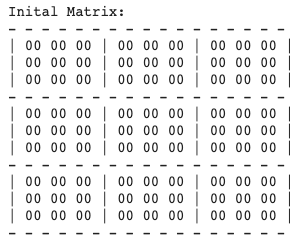

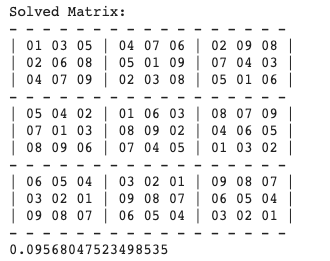



* N=4 e $\alpha$ =0.2:


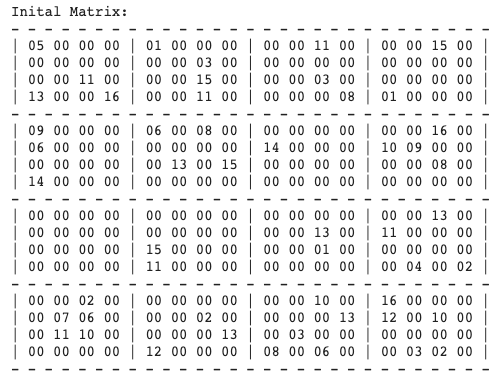



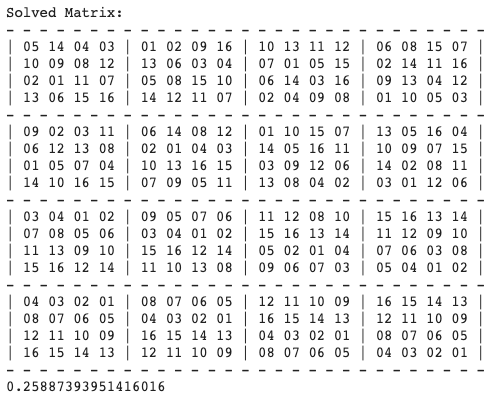

* N=5 e $\alpha$ =0.6:

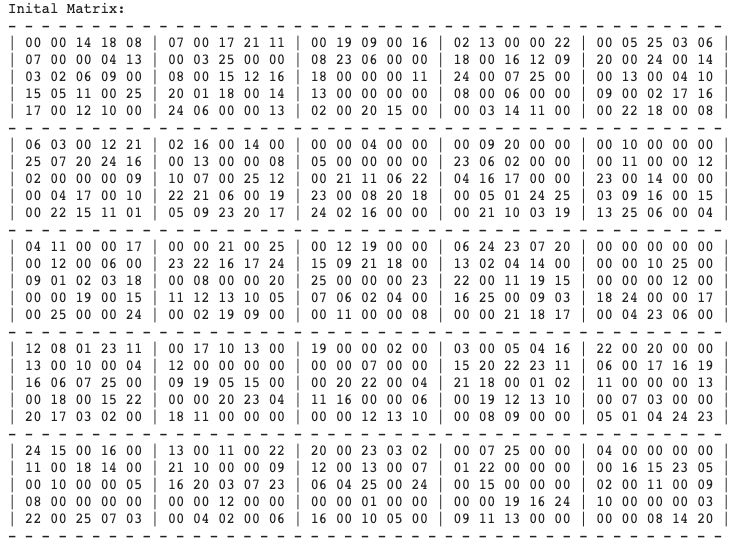


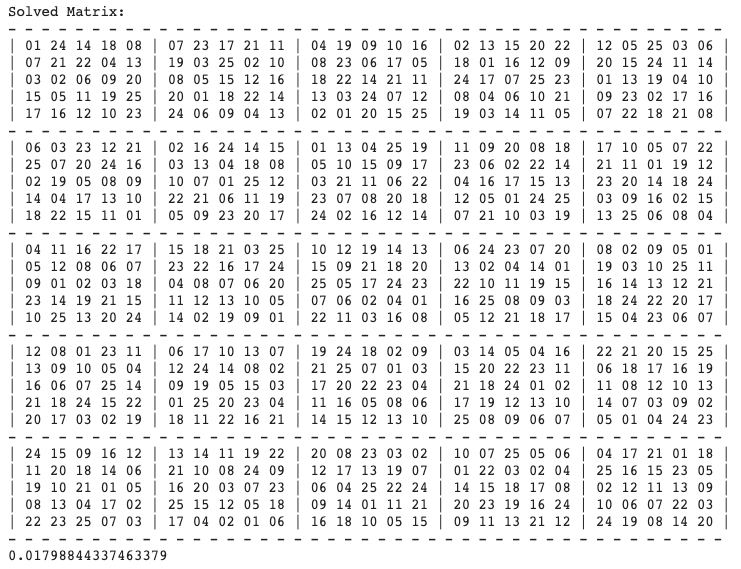

* N=6 e $\alpha$ =0.8:

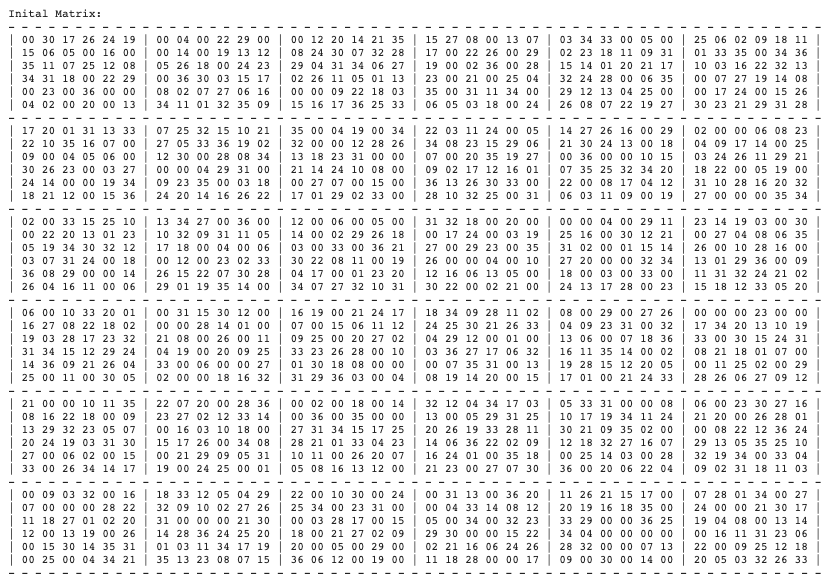

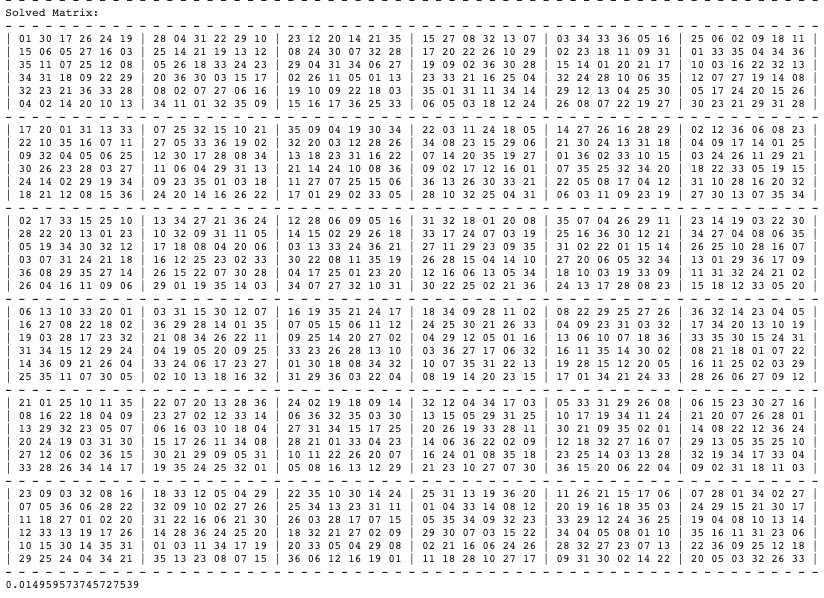


Observando a tabela abaixo, temos que à medida que o alpha aumenta, ou seja, à medida que diminui as casas do sudoku que o utilizador tem de preencher, diminui o tempo necessário para gerar o mesmo. 
Já à medida que o N aumenta, se observarmos para o valor do alpha mais baixo (0.0), ou seja, para o valor que significa que só existem casas brancas no sudoku que vamos gerar, deparamos que aumenta também o tempo de gerar o sudoku, pelo que a função que o gera é exponencial.


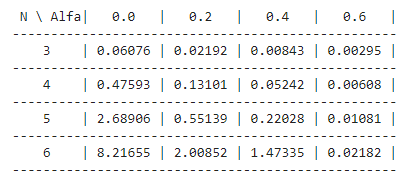